In [2]:
import cv2
#opening webcam and closing it by pressing 'q'
cam = cv2.VideoCapture(1)

while(True):
    success, frame = cam.read()
    #frame = 255 - frame #reversing
    #frame += 255 #incrementing
    cv2.imshow("frame", frame)
    key = cv2.waitKey(10) & 0xFF
    if(key == ord('q')):
        break

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

In [1]:
#problem 1 applyign green filter to a video:
import cv2
import numpy as np

def do_nothing(x):
    pass

cv2.namedWindow("trackbar")

cv2.createTrackbar("low_h", "trackbar", 0, 255, do_nothing)
cv2.createTrackbar("low_s", "trackbar", 0, 255, do_nothing)
cv2.createTrackbar("low_v", "trackbar", 0, 255, do_nothing)

cv2.createTrackbar("high_h", "trackbar", 0, 255, do_nothing)
cv2.createTrackbar("high_s", "trackbar", 0, 255, do_nothing)
cv2.createTrackbar("high_v", "trackbar", 0, 255, do_nothing)

vid = "balls1.mp4"
cam = cv2.VideoCapture(vid)
if not cam.isOpened():
    print('cannot open video')
    exit()

while True:
    success, frame = cam.read()
    
    if(success == False):
        cam.release()
        cam = cv2.VideoCapture(vid)
        continue
    frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lh = cv2.getTrackbarPos("low_h", "trackbar")
    ls = cv2.getTrackbarPos("low_s", "trackbar")
    lv = cv2.getTrackbarPos("low_v", "trackbar")

    hh = cv2.getTrackbarPos("high_h", "trackbar")
    hs = cv2.getTrackbarPos("high_s", "trackbar")
    hv = cv2.getTrackbarPos("high_v", "trackbar")

    mask = cv2.inRange(frame1, (lh,ls,lv), (hh, hs, hv))

    kernel = np.ones((7,7), np.uint8)
    eroded = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)

     # Perform the operation
    output = cv2.connectedComponentsWithStats(eroded, 8, cv2.CV_32S)
    # Get the results
    # The first cell is the number of labels
    num_labels = output[0]
    #print(num_labels)
    # The second cell is the label matrix
    labels = output[1]
    # cv2.imshow("labels", labels.astype(np.uint8)*4)
    # The third cell is the stat matrix
    stats = output[2]
    #print(stats[5])

    for i in range(1, num_labels): #num_labels = num of objects
        t = stats[i, cv2.CC_STAT_TOP]
        l = stats[i, cv2.CC_STAT_LEFT]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        a = stats[i, cv2.CC_STAT_AREA]
        density = a/(w*h)
        ndensity = round(density, 2)

        if ndensity > 0.6:
            org = (l, t)
            fontFace = cv2.FONT_HERSHEY_SIMPLEX
            # fontScale = 1.0
            # color = (0, 255, 0)  # Green color
            # thickness = 2
            # lineType = cv2.LINE_AA
            if(a>900):
                cv2.rectangle(frame, (l,t), (l+w, t+h), (120, 34, 98), 3) 
                #(120, 34, 98) is a random color for the bounding box
                cv2.putText(frame, str(ndensity), org, fontFace, 0.5, (255, 0, 0), 1, cv2.LINE_AA)



    cv2.imshow("eroded", eroded)

    # frame[:, :, 0] +=i
    cv2.imshow("frame", frame)
    cv2.imshow("framehsv", frame1)
    key = cv2.waitKey(20) & 0xff
    if(key ==ord('q')): break

    #i +=1


cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

gue values:

yellow: 13-39

green: 50-90

blue: 95-110

red: ls=74 lv=170

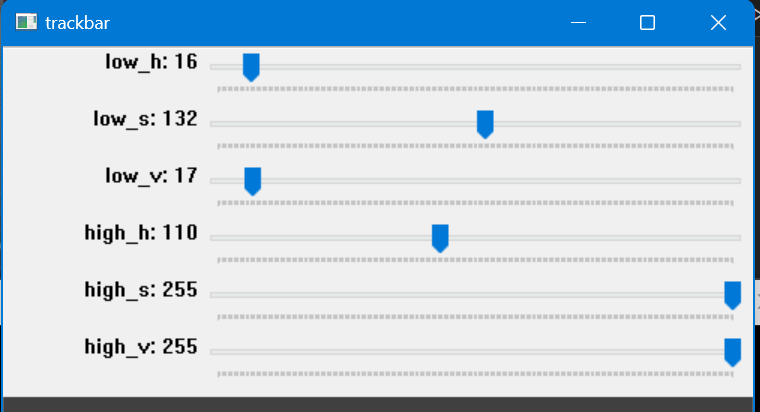
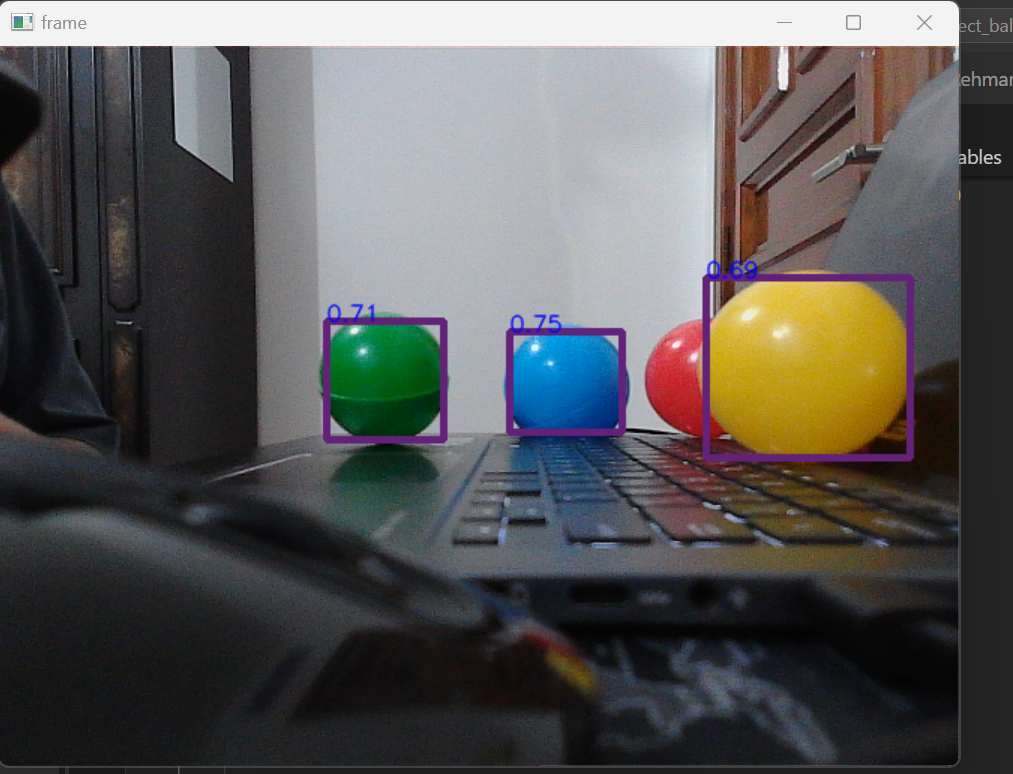

multiple colors


In [16]:
#python color_tracking.py --video balls.mp4
#python color_tracking.py
 
# import the necessary packages
from collections import deque
import numpy as np
import argparse
import imutils
import cv2
import urllib #for reading image from URL
 
 
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-v", "--video", help="path to the (optional) video file")
# ap.add_argument("-b", "--buffer", type=int, default=64, help="max buffer size")
# args = vars(ap.parse_args())
 
# define the lower and upper boundaries of the colors in the HSV color space
lower = {'red':(166, 84, 141), 'green':(66, 122, 129), 'blue':(97, 100, 117), 'yellow':(23, 59, 119), 'orange':(0, 50, 80)} #assign new item lower['blue'] = (93, 10, 0)
upper = {'red':(186,255,255), 'green':(86,255,255), 'blue':(117,255,255), 'yellow':(54,255,255), 'orange':(20,255,255)}
 
# define standard colors for circle around the object
colors = {'red':(0,0,255), 'green':(0,255,0), 'blue':(255,0,0), 'yellow':(0, 255, 217), 'orange':(0,140,255)}
 
#pts = deque(maxlen=args["buffer"])
 
# if a video path was not supplied, grab the reference
# to the webcam
# if not args.get("video", False):
camera = cv2.VideoCapture(1)
    
 
# otherwise, grab a reference to the video file
# else:
#     camera = cv2.VideoCapture(args["video"])
# keep looping
while True:
    # grab the current frame
    (success, frame) = camera.read()
    # if we are viewing a video and we did not grab a frame,
    # then we have reached the end of the video
    if(success == False):
        camera.release()
        #cam = cv2.VideoCapture("saved/field.mp4")
        continue
 
    #IP webcam image stream 
    #URL = 'http://10.254.254.102:8080/shot.jpg'
    #urllib.urlretrieve(URL, 'shot1.jpg')
    #frame = cv2.imread('shot1.jpg')
 
 
    # resize the frame, blur it, and convert it to the HSV
    # color space
    frame = imutils.resize(frame, width=600)
 
    blurred = cv2.GaussianBlur(frame, (11, 11), 0)
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    #for each color in dictionary check object in frame
    for key, value in upper.items():
        # construct a mask for the color from dictionary`1, then perform
        # a series of dilations and erosions to remove any small
        # blobs left in the mask
        kernel = np.ones((9,9),np.uint8)
        mask = cv2.inRange(hsv, lower[key], upper[key])
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
                
        # find contours in the mask and initialize the current
        # (x, y) center of the ball
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)[-2]
        center = None
        
        # only proceed if at least one contour was found
        if len(cnts) > 0:
            # find the largest contour in the mask, then use
            # it to compute the minimum enclosing circle and
            # centroid
            c = max(cnts, key=cv2.contourArea)
            ((x, y), radius) = cv2.minEnclosingCircle(c)
            M = cv2.moments(c)
            center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
        
            # only proceed if the radius meets a minimum size. Correct this value for your obect's size
            if radius > 0.5:
                # draw the circle and centroid on the frame,
                # then update the list of tracked points
                cv2.circle(frame, (int(x), int(y)), int(radius), colors[key], 2)
                cv2.putText(frame,key + " ball", (int(x-radius),int(y-radius)), cv2.FONT_HERSHEY_SIMPLEX, 0.6,colors[key],2)
 
     
    # show the frame to our screen
    cv2.imshow("Frame", frame)
    
    key = cv2.waitKey(1) & 0xFF
    # if the 'q' key is pressed, stop the loop
    if key == ord("q"):
        break
 
# cleanup the camera and close any open windows
camera.release()
cv2.destroyAllWindows()
